In this project, I'm going to go through the full process of building out a classification model to predict if patients have heart disease or not. Some of the pieces involved in this project are exploratory data analysis, data visualization, model training, model evaluation, model comparisons, fine-tuning, and feature importance. Thanks for reading!

I'm going to go through the following steps:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Evaluation

## 1. Problem Definition

`Given clinical parameters about a patient, can we predict whether or not they have heart disease`

## 2. Data
This data originally comes from UCI's Machine Learning Repository and can be found at the following link: https://archive.ics.uci.edu/dataset/45/heart+disease

We will be using a modified version of this dataset that can be found here: https://github.com/Tackocky/heart-disease-classifier/blob/main/heart-disease.csv

## 3. Evaluation

We want to evaluate the model based on accuracy, but have to keep in mind that we must balance our accuracy against other factors as well (precision, recall, etc)

## 4. Features
This data dictionary comes from the same source as the data itself 

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. num - have disease or not (1=yes, 0=no) **This is what we will be predicting with our classifier**

## Preparing the tools

We're going to use pandas, numpy, and matplotlib for data analysis and manipulation

In [1]:
#Import all the tools we need

#Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#This ensures that our plots will appear inside the notebook

#Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Some helpful tools for optimization as well as quality of life tools for me
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA or Exploratory Data Analysis)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#Let's find out how many of each class there are. 
#Recall, 1 means the patient does have heart disease and 0 means the patient does not
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

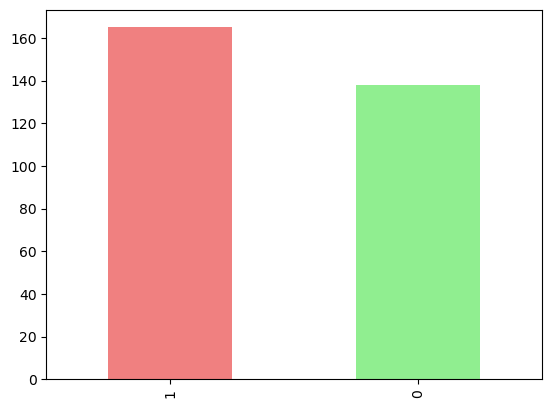

In [7]:
df.target.value_counts().plot(kind='bar',color=['lightcoral','lightgreen']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

This tells us that our dataset is very male dominated

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


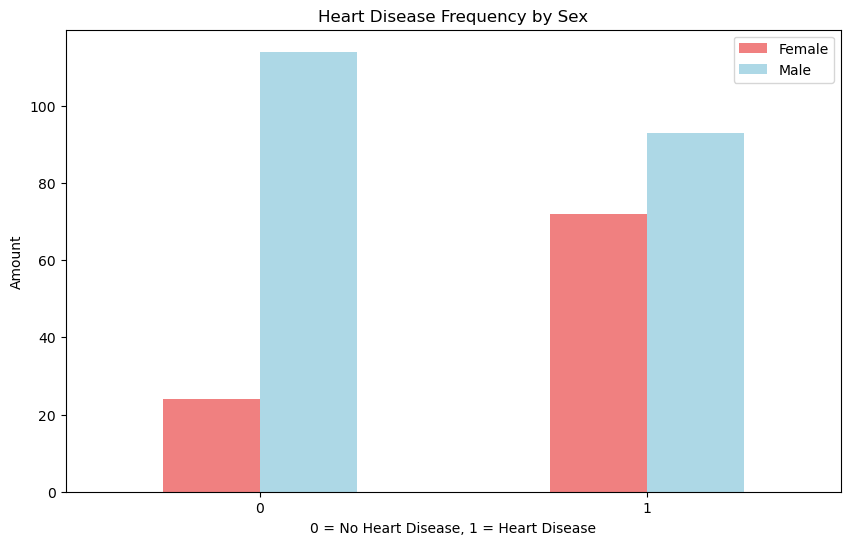

In [12]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightcoral", "lightblue"])

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age versus Max Heart Rate for Heart Disease

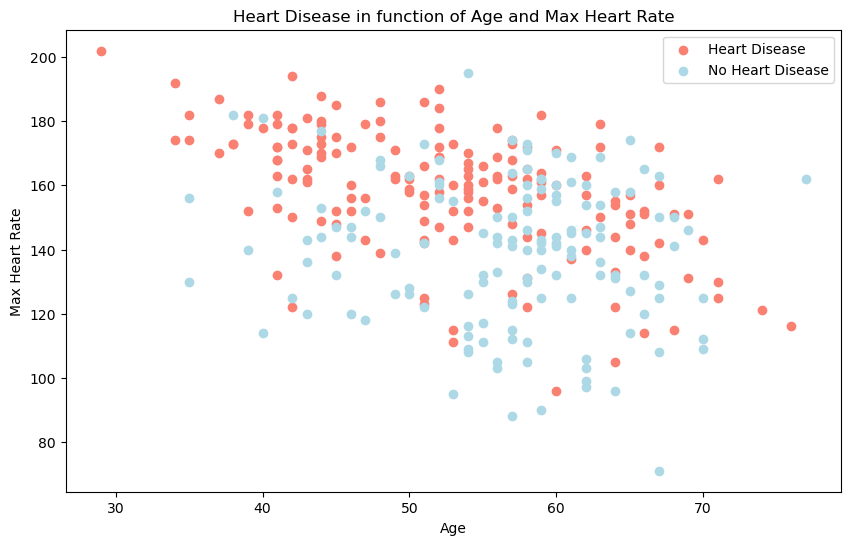

In [13]:
#Create another figure
plt.figure(figsize=(10,6))
#Scatter with the positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='lightcoral');

#Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue');

#Add some helpful information
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"])

<Axes: ylabel='Frequency'>

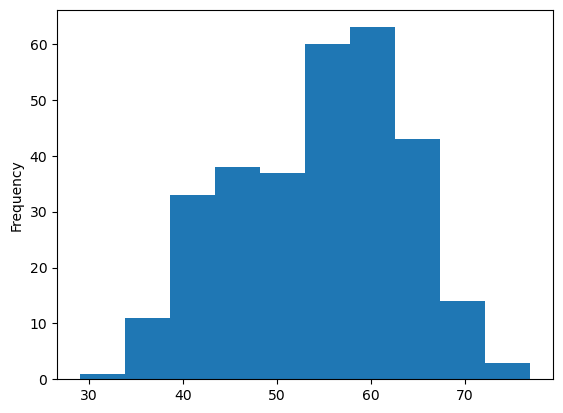

In [14]:
#Checking the distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


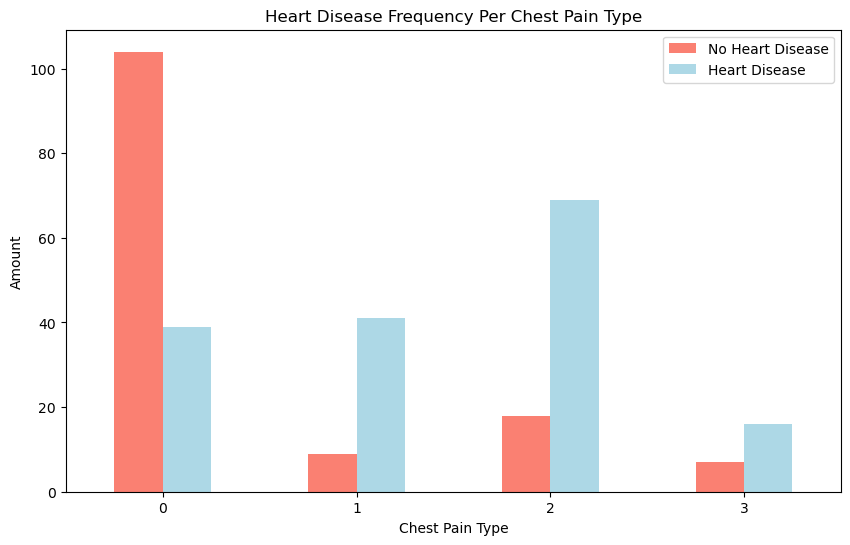

In [16]:
#Create a bar chart with the positive cases
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['lightcoral','lightblue'])
#Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease","Heart Disease"])
plt.xticks(rotation=0);

In [17]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


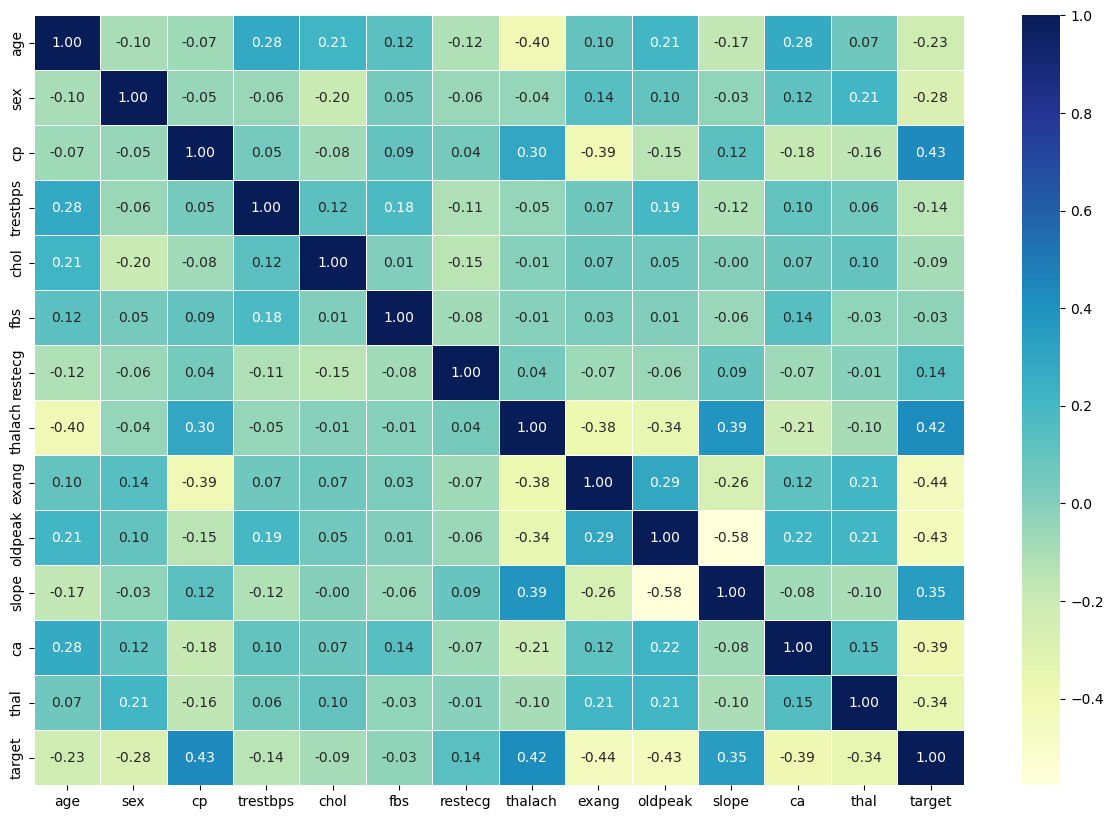

In [18]:
#Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

## 5. Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#Split data into x and y
x = df.drop('target',axis=1)
y = df['target']

np.random.seed(42)
#Create training and test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Now we've got our data into our training and test sets, it's time to build a model

We're going to try three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [21]:
#Put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#Create function for fitting and scoring
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different sklearn machine learning models
    """
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

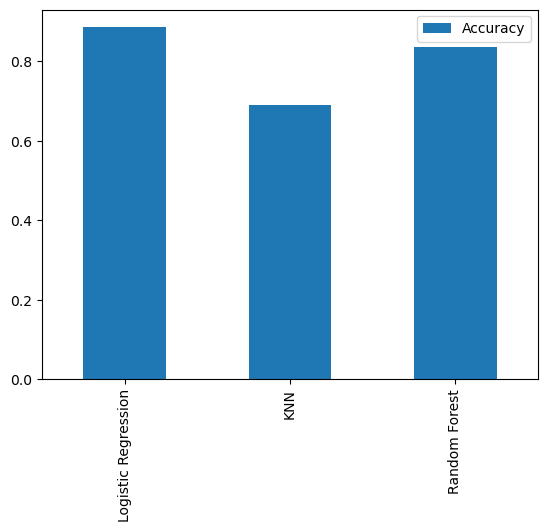

In [23]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Preicision
* Recall
* F1 Score

## Hyperparameter Tuning with GridSearchCV

Since our logistic regression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [24]:
#Different hyperparameters for our LogisticRegression model

logistic_regression_grid = {"C":np.logspace(-4,4,20),
                           "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Setup grid hyperparameter search for Logistic Regression
grid_search_logistic_regresssion = GridSearchCV(LogisticRegression(),
                                               param_grid=logistic_regression_grid,
                                               cv=5,
                                               verbose=True)

# Fit the grid hyperparameter search model
grid_search_logistic_regresssion.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [25]:
#Check the best hyperparameters
grid_search_logistic_regresssion.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [26]:
#Evaluate the grid search logistic regression model
grid_search_logistic_regresssion.score(x_test,y_test)

0.8852459016393442

## Evaluate our tuned machine learning classifier, beyond accuracy

* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score
* Classification Report

... and it would be great if cross-validation could be used when possible

To make comparisons and evaluate our trained model, first we need to make predicitions

In [27]:
#Make predictions with tuned model
y_preds = grid_search_logistic_regresssion.predict(x_test)

In [28]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


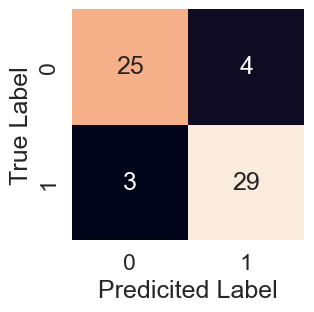

In [29]:
#Improve the visualization using Seaborn
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True, cbar=False)
    plt.xlabel("Predicited Label")
    plt.ylabel("True Label")
              
plot_confusion_matrix(y_test,y_preds)

We've got a confusion matrix

Let's get a classification report as well as cross-validated preicsion, recall, and f1-score

In [30]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Precision: proportion of positive predictions which were actually correct

Recall: proportion of actual positives which were predicted to be positive

F1-Score: A combination of precision and recall

Support: The number of samples that each metric was calculated on

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall, and f1 score of our model using cross validation and to do so we're going to be using `cross_val_score`

In [31]:
# Check our best hyperparameters
grid_search_logistic_regresssion.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [32]:
#Create a new classifier with best params
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [33]:
#Cross-validated accuracy
cross_val_acc = cross_val_score(clf, x,y,cv=5,scoring='accuracy')
cross_val_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [34]:
cross_val_acc = np.mean(cross_val_acc),
cross_val_acc

(0.8479781420765027,)

In [35]:
#Cross-validated precision
cross_val_prec = cross_val_score(clf,x,y,cv=5, scoring="precision")

cross_val_prec = np.mean(cross_val_prec)
cross_val_prec

0.8215873015873015

In [36]:
#Cross-validated recall
cross_val_recall = cross_val_score(clf,x,y,cv=5, scoring="recall")

cross_val_recall = np.mean(cross_val_recall)
cross_val_recall

0.9272727272727274

In [37]:
#Cross-validated f1-score
cross_val_f1 = cross_val_score(clf,x,y,cv=5, scoring="f1")

cross_val_f1 = np.mean(cross_val_f1)
cross_val_f1

0.8705403543192143

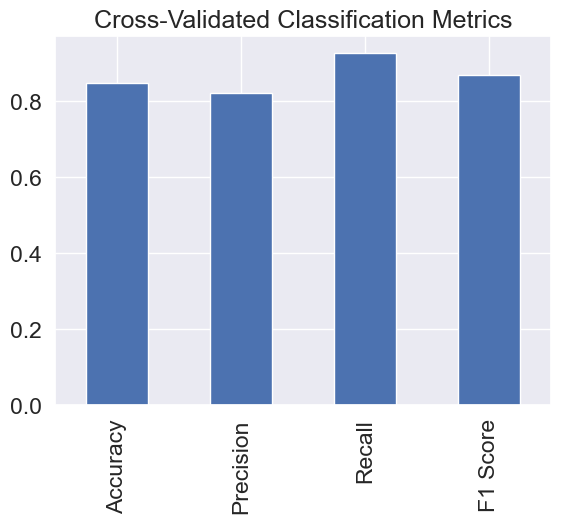

In [38]:
#Visualize our cross-validated metrics
cross_val_metrics = pd.DataFrame({"Accuracy":cross_val_acc,
                                 "Precision":cross_val_prec,
                                 "Recall":cross_val_recall,
                                 "F1 Score":cross_val_f1}, index=[0])

cross_val_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False);

In [47]:
#Aside: Let's see if we can functionalize the last bit
scoring_types={"Accuracy":"accuracy","Precision":'precision',"Recall":'recall',"F1-Score":'f1'}
def cross_validate_metrics(clf,x,y,cv_number,scoring_types):
    """
    Takes the types of scores that you want for a classifier and then returns a dictionary of those scores for you
    """
    np.random.seed(42)
    #Make an empty dict for scores:
    scores_dict={}
    #Loop through scores
    for scoring_name,score_type in scoring_types.items():
        scores_dict[scoring_name]=np.mean(cross_val_score(clf,x,y,cv=cv_number, scoring=score_type))
    return scores_dict

cross_validate_metrics(clf,x,y,5,scoring_types)

{'Accuracy': 0.8479781420765027,
 'Precision': 0.8215873015873015,
 'Recall': 0.9272727272727274,
 'F1-Score': 0.8705403543192143}

### Feature Importance

Feature importance is another way of asking which features contributed most to the outcomes of the model? And how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for [MODEL NAME] Feature Importance

Let's find the feature importance for our logistic regression model

In [40]:
grid_search_logistic_regresssion.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [41]:
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [42]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.86044675,  0.66067032, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.5686279 ,
         0.45051633, -0.63609907, -0.67663375]])

This tells us how each of the variables in our xtrain dataset relates to the targets column

In [43]:
#Match coefs of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830677295966,
 'sex': -0.8604467464181768,
 'cp': 0.6606703196786501,
 'trestbps': -0.011569931725970527,
 'chol': -0.0016637456109837993,
 'fbs': 0.04386101205953376,
 'restecg': 0.3127586484717099,
 'thalach': 0.024593615841597527,
 'exang': -0.6041309444844618,
 'oldpeak': -0.5686278978594388,
 'slope': 0.45051632904765737,
 'ca': -0.6360990721560912,
 'thal': -0.67663374706138}

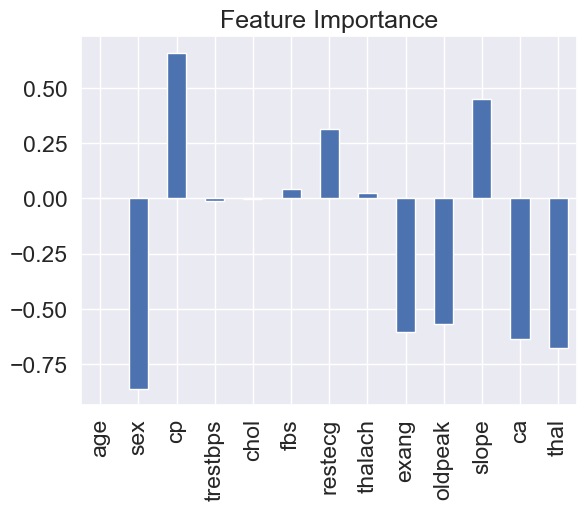

In [44]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);